In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
def preprocess_data(df):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    X = df[features].copy()
    y = df['Survived']

    X['Sex'] = X['Sex'].map({'male':0, 'female':1})
    X = pd.get_dummies(X, columns=['Embarked'], dummy_na=True)

    imputer = SimpleImputer(strategy='median')
    X['Age'] = imputer.fit_transform(X[['Age']])
    X['Fare'] = imputer.fit_transform(X[['Fare']])

    return X, y

In [4]:
X, y = preprocess_data(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test_scaled)
rf_pred = rf.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred):.4f}")
print("n\Classification Report:")
print(classification_report(y_test, logreg_pred))

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("n\Classification Report:")
print(classification_report(y_test, rf_pred))

Logistic Regression Results:
Accuracy: 0.8101
n\Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Results:
Accuracy: 0.8156
n\Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [8]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

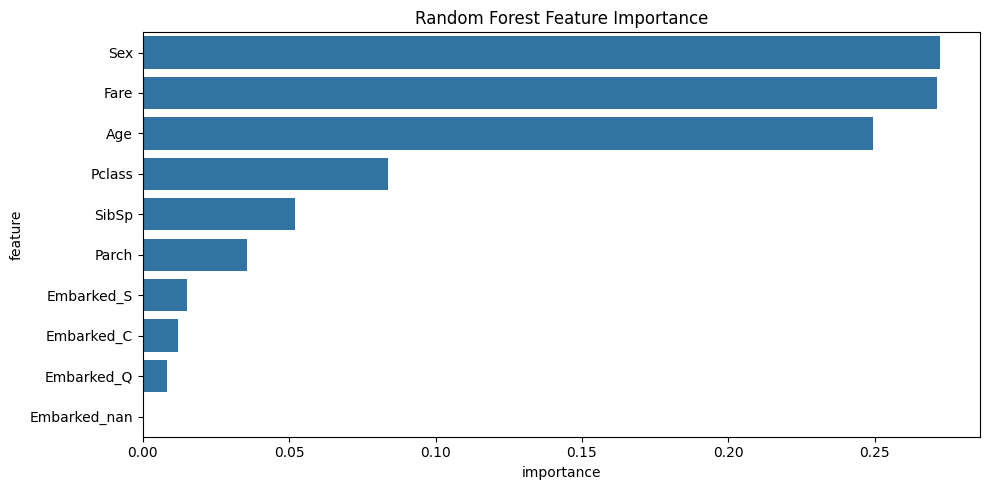

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

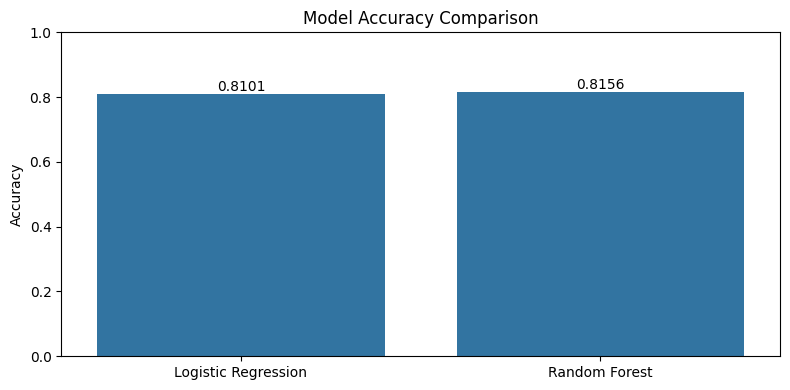

In [10]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, logreg_pred), accuracy_score(y_test, rf_pred)]

plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()